<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/SmithChart_annotated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Smith Chart</h1></b>

Dr. Bingsen Wang

2/1/2025
</center>

Text(0.0, -1.077, '@eeanimation')

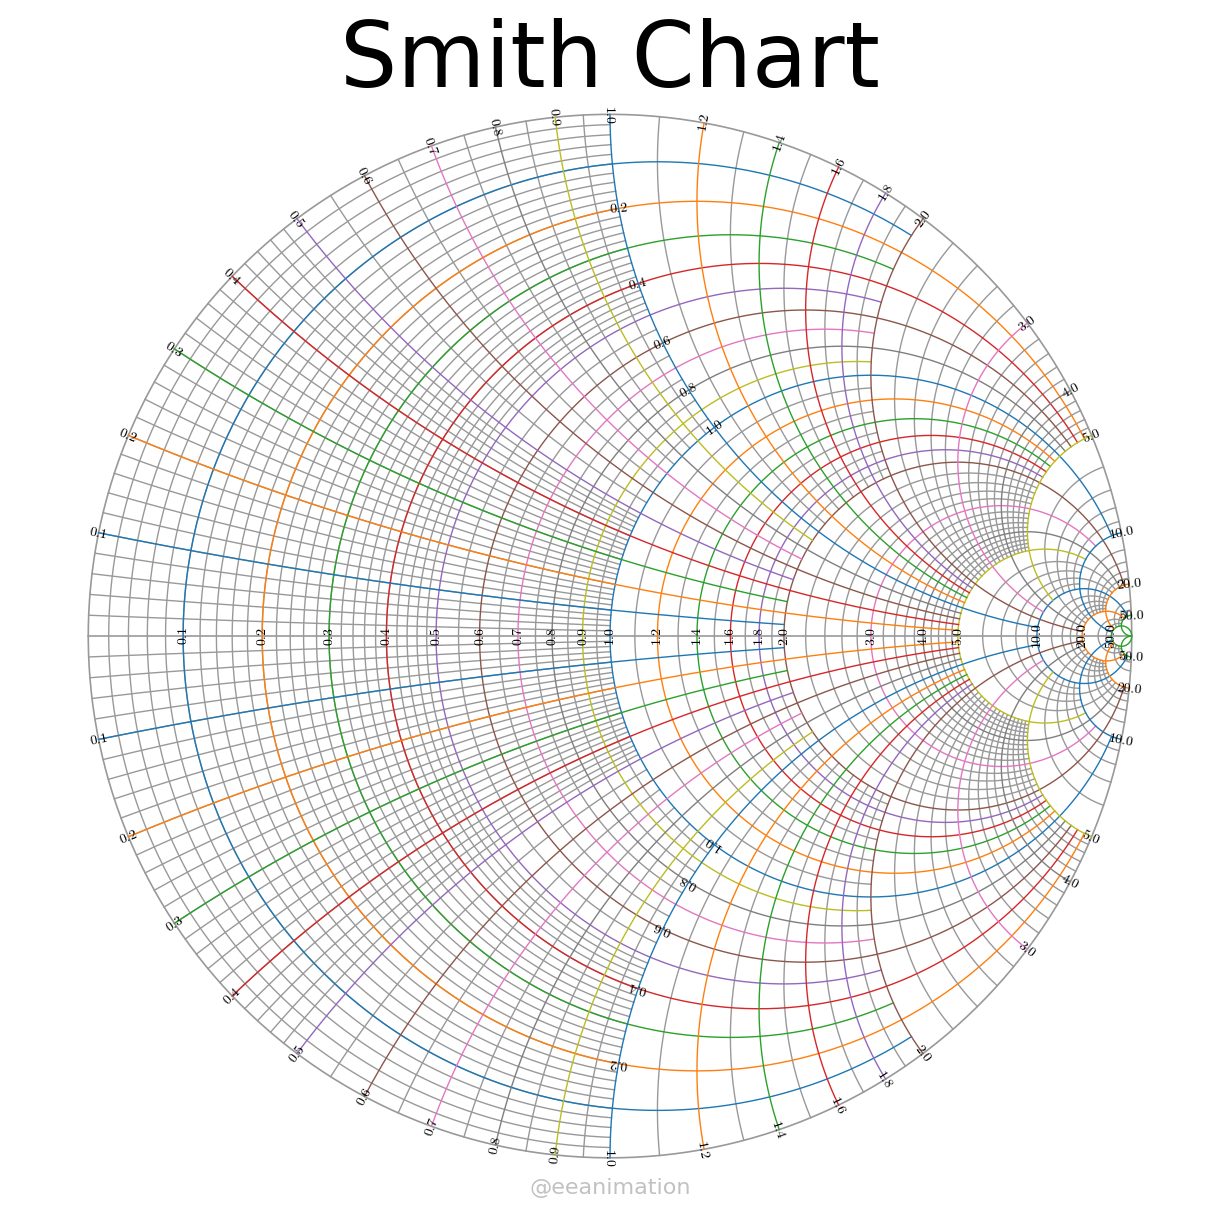

In [1]:
from matplotlib import pyplot,cm; import numpy as np
pyplot.rcParams.update({'font.family':"sans serif",'mathtext.fontset':'cm'})

c2ir = lambda z: (np.array(z).real,np.array(z).imag)
f = lambda z: (z-1)/(z+1)
ph=lambda z: np.angle(1/(z+1)**2,deg=True)

Npts=500;y=np.linspace(-1,1,Npts);x=np.linspace(0,1,Npts)
cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([12,12]))
ax= fig.add_axes([0,0,1,1],xlim=[-1.15,1.15],ylim=[-1.1,1.2]);ax.axis('off')
ax.text(0,1.1,'Smith Chart',size=65,ha='center',va='center')
ax.plot(*c2ir(np.exp(1j*np.linspace(0,2*np.pi,Npts))),c='.6',lw=1.2) #the outer circle
ax.plot(*c2ir([-1,1]),c='.6',lw=1.2) #the horizontal line

zr = [.1*(k+1)for k in range(10)]+[1.2,1.4,1.6,1.8,2,3,4,5,10,20,50] #major grids
ym = [2,  5]*4+[2,10]+ [5]*4+[20,10]*2+[50,50,1000]
[ax.plot(*c2ir(f(zr[k]+1j*ym[k]*y)),lw=1,c=cl[k%9])for k in range(len(zr))] #re=zr
[ax.plot(*c2ir(f(ym[k]*x+(-1)**i*1j*zr[k])),lw=1,c=cl[k%9])for k in range(len(zr)) for i in range(2)] #im=zr
[ax.text(*c2ir(f(zr[k])),rf'${zr[k]:.1f}$',rotation=ph(zr[k])+90,ha='center',va='center')for k in range(len(zr))]
[ax.text(*c2ir(f(zr[2*k+1]+1j*(-1)**i)),rf'${zr[k*2+1]:.1f}$',rotation=ph(zr[2*k]+1j*(-1)**i)+90,ha='center',va='center')for k in range(5) for i in range(2)]
[ax.text(*c2ir(f(zr[k]*1j*(-1)**i)),rf'${zr[k]:.1f}$',rotation=(ph(zr[k]*1j*(-1)**i)+90)%180-90,ha='center',va='center')for k in range(len(zr)) for i in range(2)]

zr1=[.02*(k+1) for k in range(24)] + [[.55,1.1][i]+[.1,.2][i]*k for i in range(2) for k in range(5)]
zr1 += [[2.2,3.2,4.2,6,12][i]+[.2,.2,.2,1,2][i]*k for i in range(5) for k in range(4)]+[30,40]
ym1=[1]*29+[2]*5 +[5]*12+[20,10,20,10]+[20]*4+[50]*2
[ax.plot(*c2ir(f(zr1[k]+1j*ym1[k]*y)),lw=1,c='.6',zorder=-3)for k in range(len(zr1))] #re=zr1
[ax.plot(*c2ir(f(ym1[k]*x+(-1)**i*1j*zr1[k])),lw=1,c='.6',zorder=-3)for k in range(len(zr1)) for i in range(2)] #im=zr1
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=16,c='.2',alpha=.3,ha='center',va='bottom')
fig.savefig('SmithChart.pdf')